In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Importing dataset

In [8]:
df = pd.read_csv('C:/Users/ShinjiniPC/Downloads/Cleaned_Data.csv',engine='python')

In [7]:
df.shape

(1419602, 24)

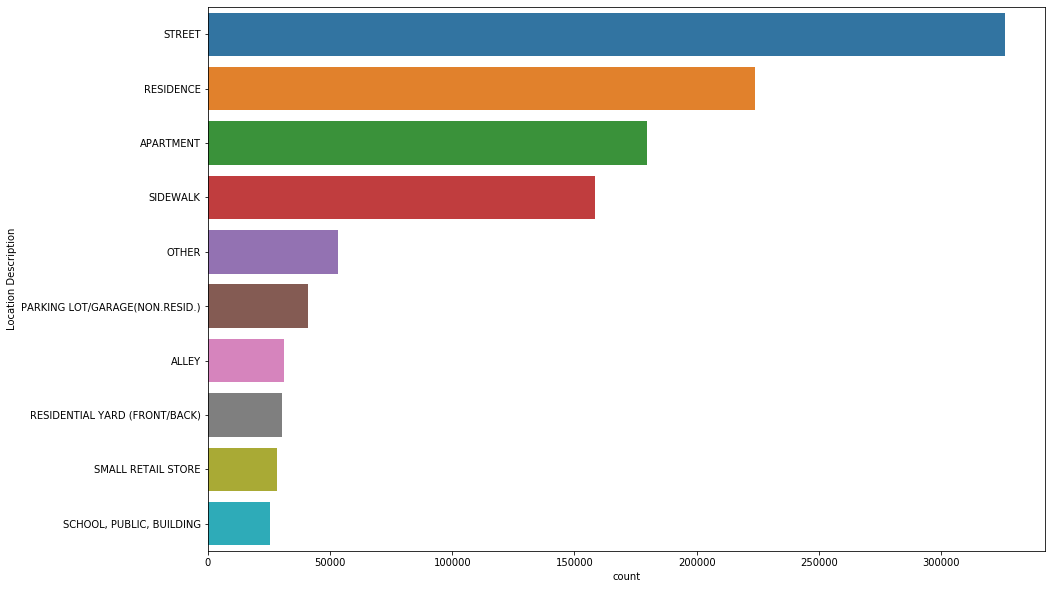

In [5]:
#Scene of Crime

plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

### Header
- removed junk values
- plot lat/long



In [11]:
df_cleaned = df[(df['Latitude']>40) & (df['Longitude']>-89)]

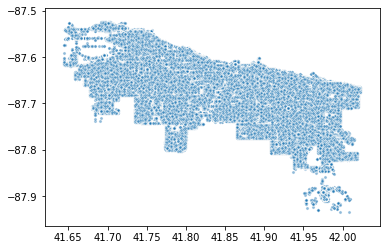

In [12]:
la = list(df_cleaned['Latitude'])
lo = list(df_cleaned['Longitude'])

sns.scatterplot(la, lo, alpha= 0.5, s= 10, data=df)

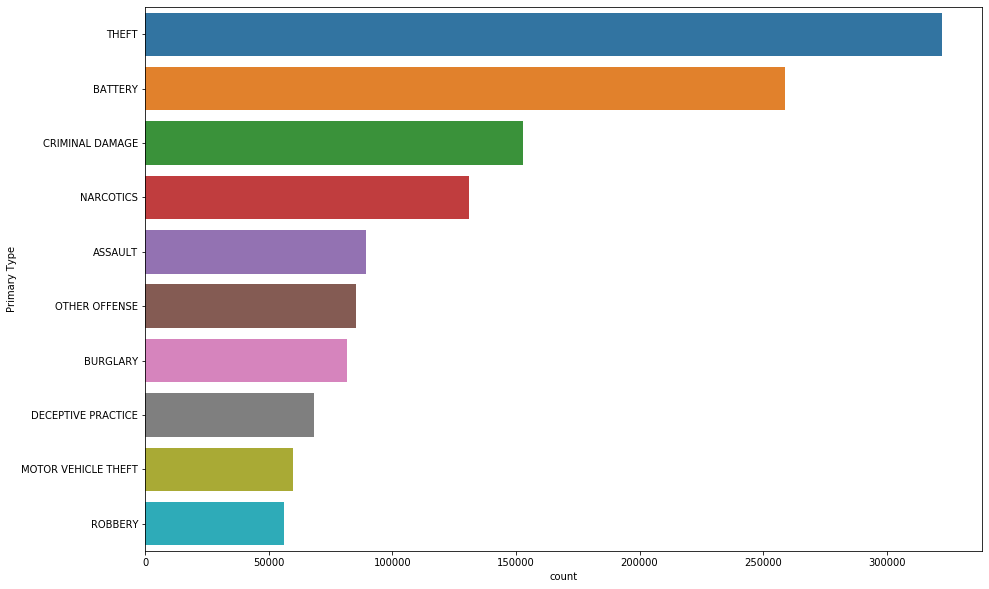

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:10].index)

#Majority of the crimes are coming from the top 4 categories.

In [26]:
pd.value_counts(df['Location Description'])[:10]
#The plot abov is just decribed below in a tabular format.

STREET                            326014
RESIDENCE                         223974
APARTMENT                         179591
SIDEWALK                          158480
OTHER                              53476
PARKING LOT/GARAGE(NON.RESID.)     40909
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28211
SCHOOL, PUBLIC, BUILDING           25476
Name: Location Description, dtype: int64

In [ ]:
#MONTHLY AND HOURLY CRIME TREND ANALYSIS

In [27]:
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
df["time_hour"]=df.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H"))
df["month"]=df.Date.apply(lambda row: datetime.strptime(row, format).strftime("%m"))

In [28]:
timegb=df.groupby(['time_hour'])["time_hour"].count()/len(df)*100
print(timegb)

time_hour
00    4.767886
01    3.027891
02    2.603617
03    2.145672
04    1.609677
05    1.392433
06    1.679837
07    2.373412
08    3.445261
09    4.553459
10    4.442654
11    4.604248
12    5.691102
13    4.781481
14    5.064095
15    5.501683
16    5.240694
17    5.206107
18    5.672435
19    5.811981
20    5.586425
21    5.297330
22    5.256403
23    4.244218
Name: time_hour, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

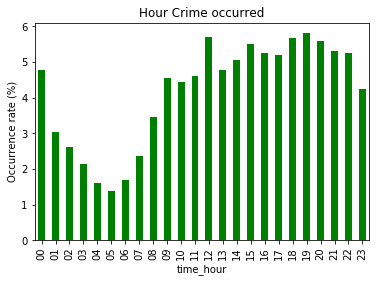

In [36]:
timegb.plot(kind='bar',title="Hour Crime occurred",color='green')
plt.ylabel('Occurrence rate (%)')

In [37]:
month_group=df.groupby(['month'])['month'].count()/len(df)*100
print(month_group)

month
01    7.768938
02    6.769996
03    8.155384
04    8.134815
05    9.020697
06    9.074233
07    9.424472
08    9.281263
09    8.605581
10    8.555567
11    7.732167
12    7.476884
Name: month, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

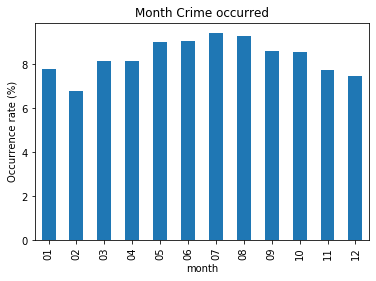

In [38]:
month_group.plot(kind='bar',title="Month Crime occurred")
plt.ylabel('Occurrence rate (%)')

In [58]:
#Having a closer look at the thefts
df_theft = df[df['Primary Type'] == 'THEFT']

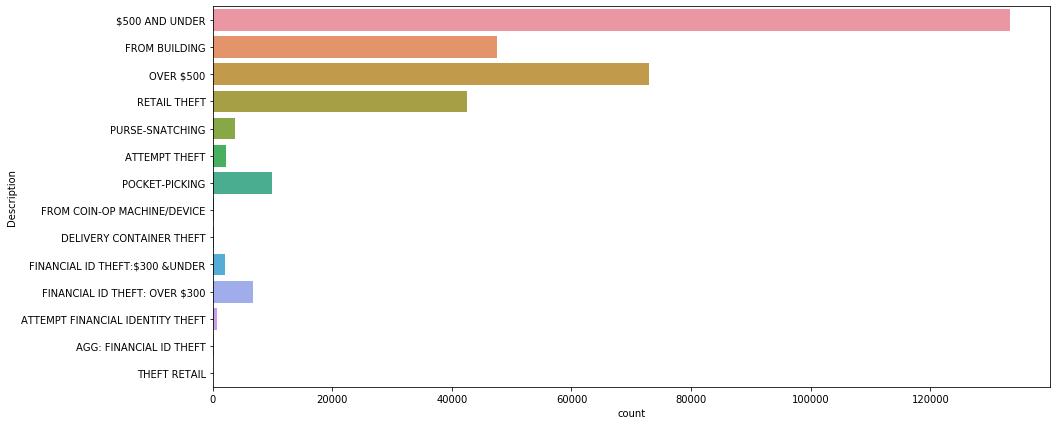

In [59]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

## Plotting in Folium

In [22]:
### Importing Chicago map 
chicago_crime_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [43]:
## Filtering for only THEFTS
theft_df = df_cleaned[df_cleaned['Primary Type']=='THEFT']


In [44]:
unique_locations = theft_df['Location'].value_counts()

In [51]:
df_folium = pd.DataFrame({"coordinates" : unique_locations.index, "theft_count":unique_locations})
df_folium.index = range(len(unique_locations))
df_folium.head()

,coordinates,theft_count
0,"(41.883500187, -87.627876698)",1766
1,"(41.754592961, -87.741528537)",1721
2,"(41.897895128, -87.624096605)",1077
3,"(41.909664252, -87.742728815)",924
4,"(41.742710224, -87.634088181)",919


In [81]:
df_folium['Lat'] = df_folium['coordinates'].apply(lambda x: float(x.split(",")[0].replace("(","")))

In [83]:
df_folium['Long'] = df_folium['coordinates'].apply(lambda x: float(x.split(",")[1].replace(")","")))

In [94]:
df_folium.head(n=10)

,coordinates,theft_count,Lat,Long
0,"(41.883500187, -87.627876698)",1766,41.883500,-87.627877
1,"(41.754592961, -87.741528537)",1721,41.754593,-87.741529
2,"(41.897895128, -87.624096605)",1077,41.897895,-87.624097
3,"(41.909664252, -87.742728815)",924,41.909664,-87.742729
4,"(41.742710224, -87.634088181)",919,41.742710,-87.634088
5,"(41.868541914, -87.639235361)",674,41.868542,-87.639235
6,"(41.979006297, -87.906463155)",637,41.979006,-87.906463
7,"(41.976290414, -87.905227221)",459,41.976290,-87.905227
8,"(41.899410159, -87.624131266)",403,41.899410,-87.624131
9,"(41.864493678, -87.639158)",402,41.864494,-87.639158


In [161]:
chicago_theft_map = folium.Map(location=[41.85, -87.60],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")



In [164]:
for i in df_folium.index[0:500]:
    lat = df_folium.loc[i,'Lat']
    long = df_folium.loc[i,'Long']
    radius = df_folium.loc[i,'theft_count']/50
    if radius > 16:
        color = "#FF4500"
    else:
        color = "#008080"

    
    popup_text = """Latitude : {}<br>
               Longitude : {}<br>
                 Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               radius
                               )

    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_theft_map)
    
    
    
    
    

In [165]:
chicago_theft_map